In [1]:
# plots
# import exp358
import os,  sys # for common import for everyone
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import pickle

import numpy as np
# from scipy.interpolate import interp1d
from scipy import interpolate # interpolate needs numbers
from scipy.interpolate import interp1d

from scipy import optimize # inversion
from tqdm import tqdm

In [2]:
%matplotlib notebook

# Reading data

## df_well

In [3]:
df_drilling_12b= pickle.load(open("0a_05_time_series.pickle","rb"))
df_drilling_12b.head()

,MD,AHT10_3,AHT20_1,AHT30_1,AHT60_1,AHT90_1,AHT90_3,APLC_1,APLC_2,APLC_4,...,invert_EricksonJarrard_high,Poisson_ratio,Fracture_Pressure,Excess_pore_pressure,Lithostatic_Load,Lithostatic_Load_lamda,Void_Ratio,effective_stress,VELP,VELS
51062,1975.02356,NaN,0.37598,1.45421,1.69695,0.91105,NaN,NaN,0.56321,NaN,...,0.363820,0.336905,1.554125e+07,-8.348533e+06,20.566016,-3462.823361,NaN,7.942594e+06,2654.90968,1316.68686
51063,1975.05005,NaN,0.37984,1.44298,1.68640,0.90267,NaN,NaN,0.55603,NaN,...,0.363807,0.336983,1.534605e+07,-8.749534e+06,21.589061,-2617.821082,NaN,8.344258e+06,2655.09844,1316.54142
51064,1975.09998,NaN,0.38711,1.42180,1.66650,0.88687,NaN,NaN,0.54249,NaN,...,0.363784,0.337131,1.497833e+07,-9.505832e+06,23.533793,-1828.297478,NaN,9.101909e+06,2655.45423,1316.26729
51065,1975.10400,NaN,0.38770,1.42010,1.66490,0.88560,NaN,NaN,0.54140,NaN,...,0.363781,0.337143,1.495344e+07,-9.557168e+06,23.667315,-1786.614709,NaN,9.153355e+06,2655.48288,1316.24522
51066,1975.10408,NaN,0.38771,1.42003,1.66483,0.88557,NaN,NaN,0.54142,NaN,...,0.363781,0.337143,1.495297e+07,-9.558131e+06,23.669829,-1785.786761,NaN,9.154320e+06,2655.48346,1316.24477


In [4]:
df_drilling_12b.describe()

,MD,AHT10_3,AHT20_1,AHT30_1,AHT60_1,AHT90_1,AHT90_3,APLC_1,APLC_2,APLC_4,...,invert_EricksonJarrard_high,Poisson_ratio,Fracture_Pressure,Excess_pore_pressure,Lithostatic_Load,Lithostatic_Load_lamda,Void_Ratio,effective_stress,VELP,VELS
count,126801.000000,126487.000000,126801.000000,126801.000000,126801.000000,126801.000000,126487.000000,125682.000000,126313.000000,125715.000000,...,126801.000000,126801.000000,1.268010e+05,1.268010e+05,126801.000000,126801.000000,126793.000000,1.268010e+05,126801.000000,126801.000000
mean,3181.054461,7.294273,8.134969,8.866878,9.584755,9.351129,9.369472,0.252433,0.216393,0.252652,...,0.270764,0.298917,3.617778e+07,2.207132e+06,0.142584,0.155903,0.212498,8.922642e+06,3331.592522,1783.297222
std,677.039351,13.266289,18.788358,25.508295,34.901241,30.751502,30.786774,0.068731,2.393556,0.069169,...,0.064610,0.047777,1.012633e+07,4.046281e+06,3.770971,18.969206,0.109187,6.494308e+06,402.485096,353.997851
min,1975.023560,0.774400,0.263100,0.692100,0.413900,0.298330,0.646000,0.039820,-333.010500,0.026580,...,0.087147,0.169230,1.420352e+07,-1.166515e+07,-787.907426,-3462.823361,0.000100,8.485464e+02,2642.450010,1209.063960
25%,2593.500000,2.139880,2.068460,2.041400,2.032130,2.036650,2.040420,0.206950,0.206860,0.206920,...,0.223758,0.263145,2.720689e+07,-1.803230e+05,-0.041793,0.514981,0.128452,4.191816e+06,3035.100240,1504.247280
50%,3183.800050,3.323170,3.162780,3.104390,3.029380,3.031600,3.039110,0.260500,0.260870,0.260730,...,0.279873,0.315574,3.580936e+07,1.017324e+06,0.118049,0.589377,0.171262,7.480483e+06,3288.553600,1688.438760
75%,3772.444580,7.114880,7.109780,7.104360,7.080310,7.110300,7.124130,0.303047,0.303940,0.303640,...,0.327122,0.337212,4.345021e+07,3.339621e+06,0.335591,0.697339,0.284423,1.219720e+07,3571.346190,2036.840760
max,4349.800780,175.288800,305.695890,462.426910,881.688480,810.287720,810.287720,0.750740,3.296900,0.761500,...,0.364722,0.379826,6.150835e+07,1.705721e+07,393.695676,0.998808,0.612513,3.144209e+07,4414.149900,2736.801510


# NEURAL NETWORKS

In [5]:
#----------------------- Artificial Neural Network for classification --------------------#
#importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import *

import seaborn as sns

In [6]:
df_new_ML= df_drilling_12b[['MD_mbsf','AHT90_3','DTCO_2','DTSM_1',
                          'ECGR_2','VCL_1','VPVS_1','PHIT_1','PEFZ_4','RHOZ_4','Pore_Pressure_Estimated_DT']]
df_new_ML = df_new_ML.dropna()
df_new_ML.shape

(126411, 11)

### Feature Selection

In [7]:
X = df_new_ML.drop("Pore_Pressure_Estimated_DT", 1)       # feature matrix
y = df_new_ML['Pore_Pressure_Estimated_DT']               # target feature
df_new_ML.head()

/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/1871822838.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_new_ML.drop("Pore_Pressure_Estimated_DT", 1)       # feature matrix


,MD_mbsf,AHT90_3,DTCO_2,DTSM_1,ECGR_2,VCL_1,VPVS_1,PHIT_1,PEFZ_4,RHOZ_4,Pore_Pressure_Estimated_DT
52979,83.09524,32.32600,113.94030,228.00533,39.47200,0.02050,1.99881,0.30080,1.87300,2.15550,2.015733e+07
52980,83.10000,32.56354,113.94000,228.16000,39.58338,0.02087,2.00000,0.30081,1.87460,2.15511,2.015719e+07
52981,83.11481,33.30276,113.99233,228.57863,39.93000,0.02200,2.00296,0.30084,1.87959,2.15388,2.015674e+07
52982,83.11481,33.30276,113.99233,228.57863,39.93000,0.02200,2.00296,0.30084,1.87959,2.15388,2.015674e+07
52983,83.11482,33.30312,113.99236,228.57883,39.93016,0.02200,2.00296,0.30084,1.87959,2.15388,2.015674e+07


#### Forward Selection

In [8]:

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# Sequential Forward Selection(sfs)
ForwardSelection = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
ForwardSelection.fit(X, y)
ForwardSelection.k_feature_names_

('MD_mbsf',
 'AHT90_3',
 'DTCO_2',
 'DTSM_1',
 'ECGR_2',
 'VCL_1',
 'VPVS_1',
 'PHIT_1',
 'PEFZ_4',
 'RHOZ_4')

In [9]:
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(ForwardSelection.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.830726480211508],0.830726,"(MD_mbsf,)"
2,"(0, 3)",[0.9365646164353747],0.936565,"(MD_mbsf, DTSM_1)"
3,"(0, 3, 8)",[0.9405616348718537],0.940562,"(MD_mbsf, DTSM_1, PEFZ_4)"
4,"(0, 3, 7, 8)",[0.9472131038662643],0.947213,"(MD_mbsf, DTSM_1, PHIT_1, PEFZ_4)"
5,"(0, 3, 7, 8, 9)",[0.954305280651626],0.954305,"(MD_mbsf, DTSM_1, PHIT_1, PEFZ_4, RHOZ_4)"
6,"(0, 2, 3, 7, 8, 9)",[0.9579491732147868],0.957949,"(MD_mbsf, DTCO_2, DTSM_1, PHIT_1, PEFZ_4, RHOZ_4)"
7,"(0, 2, 3, 6, 7, 8, 9)",[0.979000547728706],0.979001,"(MD_mbsf, DTCO_2, DTSM_1, VPVS_1, PHIT_1, PEFZ..."
8,"(0, 2, 3, 5, 6, 7, 8, 9)",[0.9792291978056238],0.979229,"(MD_mbsf, DTCO_2, DTSM_1, VCL_1, VPVS_1, PHIT_..."
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)",[0.9792968625642025],0.979297,"(MD_mbsf, AHT90_3, DTCO_2, DTSM_1, VCL_1, VPVS..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9793094082243815],0.979309,"(MD_mbsf, AHT90_3, DTCO_2, DTSM_1, ECGR_2, VCL..."


/Users/pwavodij/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pwavodij/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


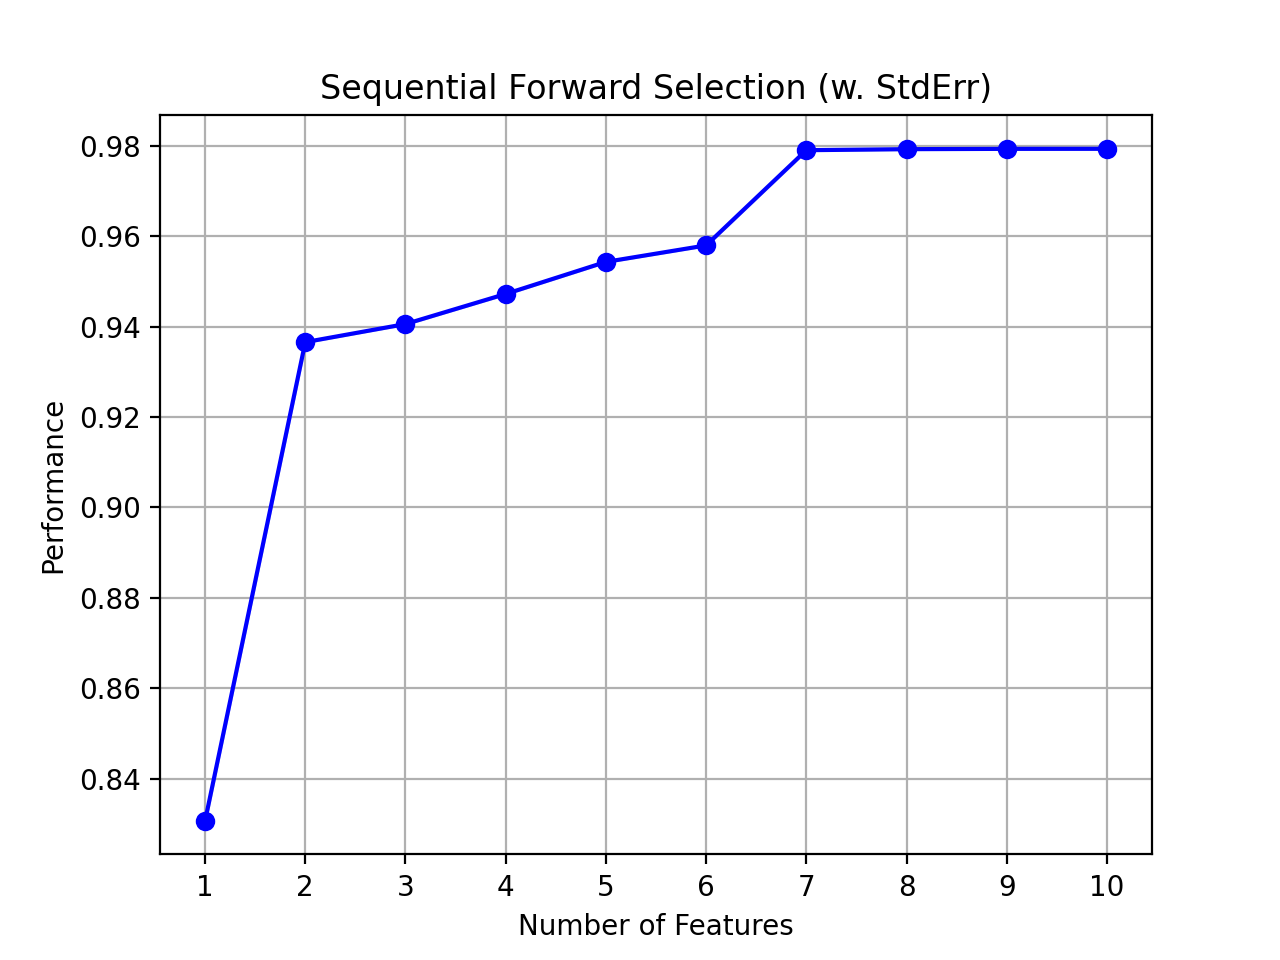

In [10]:
fig1 = plot_sfs(ForwardSelection.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#### Stepwise Selection

In [17]:
StepwiseSelection = SFS(LinearRegression(),
          k_features=(3,10),
          forward=True,
          floating=True,
          cv = 0)
StepwiseSelection.fit(X, y)
StepwiseSelection.k_feature_names_

('MD_mbsf',
 'AHT90_3',
 'DTCO_2',
 'DTSM_1',
 'ECGR_2',
 'VCL_1',
 'VPVS_1',
 'PHIT_1',
 'PEFZ_4',
 'RHOZ_4')

In [18]:
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(StepwiseSelection.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.830726480211508],0.830726,"(MD_mbsf,)"
2,"(0, 3)",[0.9365646164353747],0.936565,"(MD_mbsf, DTSM_1)"
3,"(0, 3, 8)",[0.9405616348718537],0.940562,"(MD_mbsf, DTSM_1, PEFZ_4)"
4,"(0, 3, 7, 8)",[0.9472131038662643],0.947213,"(MD_mbsf, DTSM_1, PHIT_1, PEFZ_4)"
5,"(0, 3, 7, 8, 9)",[0.954305280651626],0.954305,"(MD_mbsf, DTSM_1, PHIT_1, PEFZ_4, RHOZ_4)"
6,"(0, 2, 3, 7, 8, 9)",[0.9579491732147868],0.957949,"(MD_mbsf, DTCO_2, DTSM_1, PHIT_1, PEFZ_4, RHOZ_4)"
7,"(0, 2, 3, 6, 7, 8, 9)",[0.979000547728706],0.979001,"(MD_mbsf, DTCO_2, DTSM_1, VPVS_1, PHIT_1, PEFZ..."
8,"(0, 2, 3, 5, 6, 7, 8, 9)",[0.9792291978056238],0.979229,"(MD_mbsf, DTCO_2, DTSM_1, VCL_1, VPVS_1, PHIT_..."
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)",[0.9792968625642025],0.979297,"(MD_mbsf, AHT90_3, DTCO_2, DTSM_1, VCL_1, VPVS..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9793094082243815],0.979309,"(MD_mbsf, AHT90_3, DTCO_2, DTSM_1, ECGR_2, VCL..."


/Users/pwavodij/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pwavodij/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


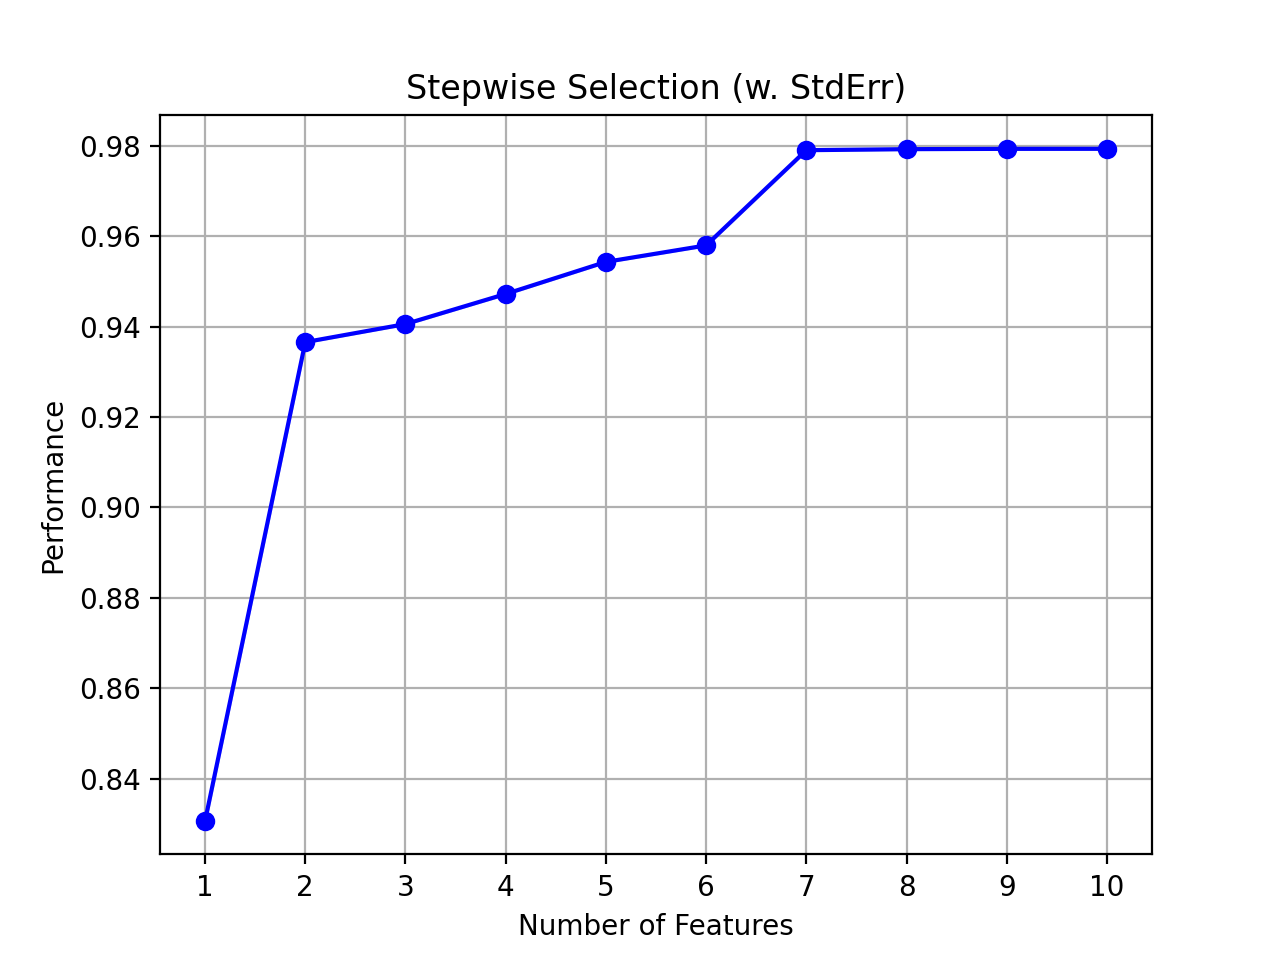

In [19]:
fig1 = plot_sfs(StepwiseSelection.get_metric_dict(), kind='std_dev')
plt.title('Stepwise Selection (w. StdErr)')
plt.grid()
plt.show()

## independent and dependent variable

In [20]:
# Specify and columns rows to independent and dependent.
# Here we consider the top part with depths assuming the hydrostatic pressure is equal to the pore pressure
X_independent_variable = df_new_ML.iloc[:,:-1].values
X_independent_variable


Y_dependent_variable = df_new_ML.iloc[:,-1].values
Y_dependent_variable, X_independent_variable

(array([20157331.05714931, 20157185.39068233, 20156742.63557394, ...,
        36970612.00488539, 36650970.63591424, 36626360.93236218]),
 array([[8.30952400e+01, 3.23260000e+01, 1.13940300e+02, ...,
         3.00800000e-01, 1.87300000e+00, 2.15550000e+00],
        [8.31000000e+01, 3.25635400e+01, 1.13940000e+02, ...,
         3.00810000e-01, 1.87460000e+00, 2.15511000e+00],
        [8.31148100e+01, 3.33027600e+01, 1.13992330e+02, ...,
         3.00840000e-01, 1.87959000e+00, 2.15388000e+00],
        ...,
        [2.41977491e+03, 9.17256000e+00, 6.87300000e+01, ...,
         1.50390000e-01, 1.96587000e+00, 2.39962000e+00],
        [2.41984012e+03, 9.18600000e+00, 6.87300000e+01, ...,
         1.51280000e-01, 1.93479000e+00, 2.39979000e+00],
        [2.41984451e+03, 9.18690000e+00, 6.87300000e+01, ...,
         1.51340000e-01, 1.93270000e+00, 2.39980000e+00]]))

## Feature Scaling and Transform

In [21]:

### Sandardization of data ###

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_independent_variable)
Y_dependent_variable = Y_dependent_variable.reshape(1,-1)
Y_dependent_variable = Y_dependent_variable.transpose()
TargetVarScalerFit=TargetVarScaler.fit(Y_dependent_variable)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X_independent_variable)
y=TargetVarScalerFit.transform(Y_dependent_variable)
 


## Split Train and Test Dataset

In [22]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(101128, 10)
(101128, 1)
(25283, 10)
(25283, 1)


## MLP Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=20, input_dim=10, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='sigmoid'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
# Optimising the model using the "Adam"
model.compile(loss='mean_squared_error', optimizer='adam',)
 
# Fitting the ANN to the Training set
# model.fit(X_train, y_train, validation_data=[X_test, y_test], 
#                   batch_size = 20, epochs = 50, verbose=1)
# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
                  batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50


2023-02-28 21:38:32.596702: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5057/5057 [==============================] - 5s 842us/step - loss: 0.0769
Epoch 2/50
5057/5057 [==============================] - 4s 854us/step - loss: 0.0083
Epoch 3/50
5057/5057 [==============================] - 4s 818us/step - loss: 0.0076
Epoch 4/50
5057/5057 [==============================] - 4s 770us/step - loss: 0.0073
Epoch 5/50
5057/5057 [==============================] - 4s 779us/step - loss: 0.0071
Epoch 6/50
5057/5057 [==============================] - 4s 713us/step - loss: 0.0070
Epoch 7/50
5057/5057 [==============================] - 4s 719us/step - loss: 0.0068
Epoch 8/50
5057/5057 [==============================] - 4s 703us/step - loss: 0.0068
Epoch 9/50
5057/5057 [==============================] - 4s 810us/step - loss: 0.0067
Epoch 10/50
5057/5057 [==============================] - 5s 965us/step - loss: 0.0066
Epoch 11/50
5057/5057 [==============================] - 4s 746us/step - loss: 0.0065
Epoch 12/50
5057/5057 [==============================] - 4s 825us/step - l

In [24]:
# Defining a function to find the best parameters for MLP
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10]
    epoch_list  =   [5, 10, 50]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create MLP model
            model = Sequential()
            # Defining the Input layer and FIRST hidden layer, both are same!
            model.add(Dense(units=20, input_dim=10, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            # after the first layer we don't have to specify input_dim as keras configure it automatically
            model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
            # Defining the Second layer of the model
            # after the first layer we don't have to specify input_dim as keras configure it automatically
            model.add(Dense(units=5, kernel_initializer='normal', activation='sigmoid'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

791/791 [==============================] - 0s 525us/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 101.9922568448381


/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/2004902786.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


791/791 [==============================] - 0s 531us/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 103.36522339807074


/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/2004902786.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


791/791 [==============================] - 0s 544us/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 101.37573995215129


/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/2004902786.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


791/791 [==============================] - 0s 513us/step
4 Parameters: batch_size: 10 - epochs: 5 Accuracy: 102.74078104927956


/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/2004902786.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


791/791 [==============================] - 0s 512us/step
5 Parameters: batch_size: 10 - epochs: 10 Accuracy: 102.97252269005324


/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/2004902786.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


791/791 [==============================] - 1s 614us/step
6 Parameters: batch_size: 10 - epochs: 50 Accuracy: 100.59439014231604


/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_12179/2004902786.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


## Predictions

In [25]:
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
# Test_Data


791/791 [==============================] - 1s 593us/step


In [26]:
r2_no=r2_score(y_test_orig,Predictions)
MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
Accuracy = 1 - MAPE

791/791 [==============================] - 0s 587us/step


In [27]:
print('R2 Score                :',r2_no)
print('Mean Absolute Error     :',MAPE)
print('Mean Absolute Error     :',Accuracy)


R2 Score                : 0.994524562429022
Mean Absolute Error     : -2.5933716852936115
Mean Absolute Error     : 3.5933716852936115


In [28]:
X_independent_columns = ['MD_mbsf','AHT90_3','DTCO_2','DTSM_1',
                          'ECGR_2','VCL_1','VPVS_1','PHIE_1','PEFZ_4','RHOZ_4']
TestingData=pd.DataFrame(data=Test_Data, columns=X_independent_columns)
TestingData['Pore_Pressure_Estimated_DT']=y_test_orig
TestingData['Predicted_Pore_Pressure']=Predictions
TestingData.head()

,MD_mbsf,AHT90_3,DTCO_2,DTSM_1,ECGR_2,VCL_1,VPVS_1,PHIE_1,PEFZ_4,RHOZ_4,Pore_Pressure_Estimated_DT,Predicted_Pore_Pressure
0,1663.52005,1.85314,86.72252,144.59477,53.74742,0.08578,1.66750,0.24888,1.86336,2.23004,3.596584e+07,36078124.0
1,2088.32050,10.28945,75.43761,125.58761,52.63114,0.06706,1.66330,0.16060,2.02651,2.37019,3.753977e+07,37556204.0
2,100.31998,31.72083,113.58000,234.28999,56.58872,0.09229,2.06000,0.32821,1.78964,2.09962,2.030027e+07,20473692.0
3,260.32010,6.20683,109.17750,225.24250,132.31265,0.35294,2.06625,0.23587,3.17544,2.25920,2.155073e+07,21310526.0
4,303.86990,12.10861,107.99688,214.57779,61.53796,0.12018,1.98334,0.30301,2.24791,2.17181,2.215362e+07,21832356.0


<IPython.core.display.Javascript object>


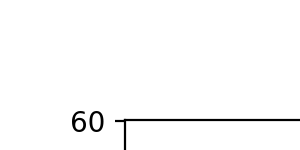

In [29]:
fig,ax=plt.subplots(sharey=True,figsize=(5,5))


# ax.scatter(df_new_ML['Pore_Pressure_Estimated_DT']/1e6, 
#            df_new_ML['MD_mbsf'], c='b', s=1,label='Orig')
ax.scatter(TestingData['Pore_Pressure_Estimated_DT']/1e6,
           TestingData['Predicted_Pore_Pressure']/1e6, 
           c='r', s=1,label='Pred')
ax.set_ylabel('Predicted Pore Pressure [MPa]')
ax.set_xlabel('Pore Pressure from Eaton [MPa]')

# ax.set_y
# ax.legend()
a, b = np.polyfit(TestingData['Pore_Pressure_Estimated_DT']/1e6,
           TestingData['Predicted_Pore_Pressure']/1e6, 1)

#add line of best fit to plot
plt.plot(TestingData['Pore_Pressure_Estimated_DT']/1e6, a*TestingData['Pore_Pressure_Estimated_DT']/1e6+b) 
# ax.invert_yaxis()

# combine results

In [30]:
RFR_Testing_Data= pickle.load(open("0a_05_RFR_Testing.pickle","rb"))
RFR_Testing_Data.head()

,MD_mbsf,AHT90_3,DTCO_2,DTSM_1,ECGR_2,VCL_1,VPVS_1,PHIE_1,PEFZ_4,RHOZ_4,Pore_Pressure_Estimated_DT,Predicted_Pore_Pressure
0,1663.52005,1.85314,86.72252,144.59477,53.74742,0.08578,1.66750,0.22930,1.86336,2.23004,3.596584e+07,3.612361e+07
1,2088.32050,10.28945,75.43761,125.58761,52.63114,0.06706,1.66330,0.14402,2.02651,2.37019,3.753977e+07,3.664451e+07
2,100.31998,31.72083,113.58000,234.28999,56.58872,0.09229,2.06000,0.31351,1.78964,2.09962,2.030027e+07,2.060617e+07
3,260.32010,6.20683,109.17750,225.24250,132.31265,0.35294,2.06625,0.17721,3.17544,2.25920,2.155073e+07,2.188703e+07
4,303.86990,12.10861,107.99688,214.57779,61.53796,0.12018,1.98334,0.28281,2.24791,2.17181,2.215362e+07,2.188703e+07


<IPython.core.display.Javascript object>


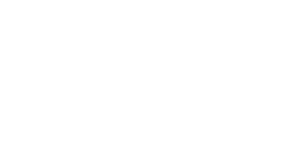

In [31]:
fig,ax=plt.subplots(sharey=True,figsize=(6,9.5))


# ax.scatter(df_new_ML['Pore_Pressure_Estimated_DT']/1e6, 
#            df_new_ML['MD_mbsf'], c='b', s=1,label='Orig')
ax.scatter(TestingData['Pore_Pressure_Estimated_DT']/1e6,
           TestingData['MD_mbsf'], 
           c='gray', s=5,label='Eaton Pore Pressure')

ax.scatter(TestingData['Predicted_Pore_Pressure']/1e6,
           TestingData['MD_mbsf'], 
           c='r', s=1,label='MLP Pore Pressure')
ax.scatter(RFR_Testing_Data['Predicted_Pore_Pressure']/1e6,
           RFR_Testing_Data['MD_mbsf'], 
           c='b', s=1,label='RFR Pore Pressure')

ax.scatter(df_drilling_12b['Hydrostatic_Pressure_at_bit']/1e6,
           df_drilling_12b['MD_mbsf'], 
           c='g', s=1,label='Hydrostatic Pressure')

ax.scatter(df_drilling_12b['Lithostatic_Pressure_at_bit']/1e6,
           df_drilling_12b['MD_mbsf'], 
           c='brown', s=1,label='Lithostatic Pressure')


ax.set_ylabel('Measured Depth [mbsf]',fontsize='large')
ax.set_xlabel('Pressure [MPa]',fontsize='large')

ax.legend(fontsize='large',loc='upper right',  markerscale=2, scatterpoints=3)
ax.invert_yaxis()

# EXPORT

In [32]:
import pickle